In [195]:
import math
import numpy as np
import matplotlib.pyplot as plt

pi =math.pi

In [196]:
Lambda=780E-6 #Wavelength of beam [mm]
w0in_x=0.637 #Beam waist of original beam at spot [mm]
spot_x=-1403 #Distance from laser head to beam spot [mm]
w0in_y=0.496
spot_y=-664


f1=1000 # Focal length of lens1 [mm]

L1=200 #Position of lens1[mm]

In [197]:
shift = 100
AOM_position_min = 525 + shift
AOM_position_max = 625 + shift

In [198]:
I=np.arange(0,1200) #Sampling of path length [mm]


In [199]:
zR0_x=pi*w0in_x**2/Lambda # Reighleigh length [mm]
q1_x=zR0_x*1j
w1_x=w0in_x*np.sqrt(1+(I-spot_x)**2/(zR0_x**2))

zR0_y=pi*w0in_y**2/Lambda # Reighleigh length [mm]
q1_y=zR0_y*1j
w1_y=w0in_y*np.sqrt(1+(I-spot_y)**2/(zR0_y**2))

In [200]:
def q2(position,q1):
  output=q1+position
  return(output)

def q3(position, focus, q1):
    output=q2(position,q1)/(1-q2(position,q1)/focus)
    return(output)

def beamradius(x,position1,focus1,w0in, spot, zR0, q1):
    if x<position1:
        output=w0in*np.sqrt(1+(x-spot)**2/(zR0**2))
    elif x>=position1:
        global w01
        x01=position1-spot-q3(position1-spot,focus1, q1).real #Focus position with lens1[mm]
        zR01=q3(position1-spot,focus1, q1).imag #Reyleigh length [mm]
        w01=np.sqrt(Lambda/pi*zR01) #Beam radius
        output=w01*np.sqrt(1+(x-x01-spot)**2/zR01**2)
    return(output)

In [201]:
wfunc_x=list(map(lambda n:beamradius(n,L1,f1,w0in_x,spot_x,zR0_x,q1_x), I))
wfunc_y=list(map(lambda n:beamradius(n,L1,f1,w0in_y,spot_y,zR0_y,q1_y), I))
print("w0_f1=",str(w01))

w0_f1= 0.4959186404821729


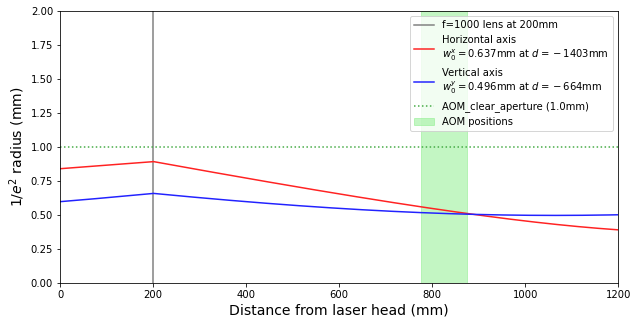

In [202]:
plt.figure(figsize=(10, 5))
plt.xlabel(r"Distance from laser head (mm)", fontsize=14)
plt.ylabel(r'$1/e^2$ radius (mm)', fontsize = 14)
plt.axvline(x=L1, color='gray', linestyle='-', label="f={:.00f} lens at {:.00f}mm".format(f1,L1))
plt.plot(I,wfunc_x,linestyle="-", color="#ff2222",label="Horizontal axis"+"\n"+r"$w_0^x={:.03f}$mm at $d={:.00f}$mm".format(w0in_x,spot_x))
plt.plot(I,wfunc_y,linestyle="-", color="#2222ff",label="Vertical axis"+"\n"+r"$w_0^y={:.03f}$mm at $d={:.00f}$mm".format(w0in_y,spot_y))
plt.axhline(y=1, color='#44aa44', linestyle=':',label="AOM_clear_aperture (1.0mm)")
plt.axvspan(xmin=525+250, xmax=625+250, alpha=0.5, color="#88ee88", label="AOM positions")

plt.xlim(0,1200)
plt.ylim(0,2.0)
plt.legend()

# Fiber coupling

## 3D MOT

In [203]:
f2 = 4.51 #[mm]
L2=800+shift #Position of lens1[mm]

In [204]:
def q2(position,q1):
  output=q1+position
  return(output)

def q3(position, focus, q1):
    output=q2(position,q1)/(1-q2(position,q1)/focus)
    return(output)

def q4(position1, position2, focus, q1):
    output = position2+q3(position1, focus, q1)
    return output

def q5(position1, position2, focus1, focus2,q1):
    output = q4(position1, position2, focus1, q1)/(1-q4(position1, position2, focus1, q1)/focus2)
    return output

def beamradius(x, position1, focus1, position2, focus2, w0in, spot, zR0, q1):
    if x<position1:
        output=w0in*np.sqrt(1+(x-spot)**2/(zR0**2))
    elif position2 >x>=position1:
        global w01
        x01=position1-spot-q3(position1-spot,focus1, q1).real #Focus position with lens1[mm]
        zR01=q3(position1-spot,focus1, q1).imag #Reyleigh length [mm]
        w01=np.sqrt(Lambda/pi*zR01) #Beam radius
        output=w01*np.sqrt(1+(x-x01-spot)**2/zR01**2)
    elif x>=position2:
        global w02
        global x02
        global zR02
        x02=position2-spot-q5(position1-spot, position2-position1, focus1, focus2, q1).real
        zR02=q5(position1-spot, position2-position1, focus1, focus2, q1).imag
        w02=np.sqrt(Lambda/pi*zR02)
        output=w02*np.sqrt(1+(x-x02-spot)**2/zR02**2)
    return(output)

In [205]:
wfunc_x=list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_x,spot_x,zR0_x,q1_x), I))
wfunc_y=list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_y,spot_y,zR0_y,q1_y), I))

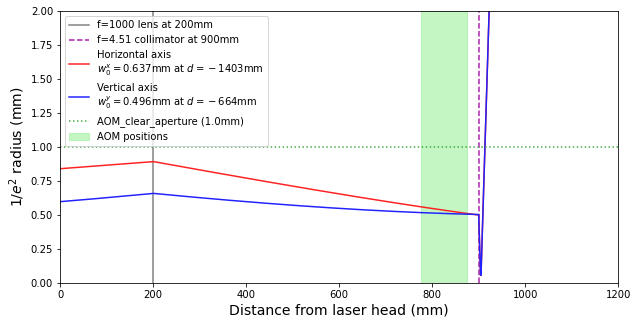

In [206]:
plt.figure(figsize=(10, 5))
plt.xlabel(r"Distance from laser head (mm)", fontsize=14)
plt.ylabel(r'$1/e^2$ radius (mm)', fontsize = 14)
plt.axvline(x=L1, color='gray', linestyle='-', label="f={:.00f} lens at {:.00f}mm".format(f1,L1))
plt.axvline(x=L2, color='#aa22aa', linestyle='--', label="f={:.02f} collimator at {:.00f}mm".format(f2,L2))
plt.plot(I,wfunc_x,linestyle="-", color="#ff2222",label="Horizontal axis"+"\n"+r"$w_0^x={:.03f}$mm at $d={:.00f}$mm".format(w0in_x,spot_x))
plt.plot(I,wfunc_y,linestyle="-", color="#2222ff",label="Vertical axis"+"\n"+r"$w_0^y={:.03f}$mm at $d={:.00f}$mm".format(w0in_y,spot_y))
plt.axhline(y=1, color='#44aa44', linestyle=':',label="AOM_clear_aperture (1.0mm)")
plt.axvspan(xmin=525+250, xmax=625+250, alpha=0.5, color="#88ee88", label="AOM positions")

plt.xlim(0,1200)
plt.ylim(0,2.0)
plt.legend()

In [207]:
I_magnified = np.linspace(x02+spot_y-zR02*1.5,x02+spot_y+zR02*1.5)
x_magnified = (I_magnified-(x02+spot_y))*1e3

In [208]:
wfunc_x=np.array(list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_x,spot_x,zR0_x,q1_x), I_magnified)))
wfunc_y=np.array(list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_y,spot_y,zR0_y,q1_y), I_magnified)))

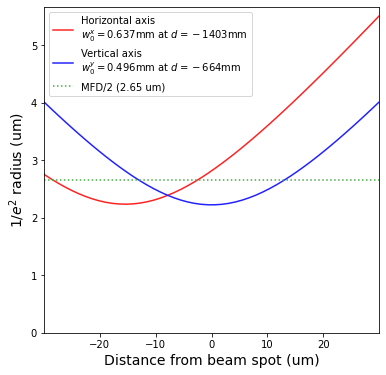

In [209]:
plt.figure(figsize=(6, 6))
plt.xlabel(r"Distance from beam spot (um)", fontsize=14)
plt.ylabel(r'$1/e^2$ radius (um)', fontsize = 14)
plt.plot(x_magnified,wfunc_x*1e3,linestyle="-", color="#ff2222",label="Horizontal axis"+"\n"+r"$w_0^x={:.03f}$mm at $d={:.00f}$mm".format(w0in_x,spot_x))
plt.plot(x_magnified,wfunc_y*1e3,linestyle="-", color="#2222ff",label="Vertical axis"+"\n"+r"$w_0^y={:.03f}$mm at $d={:.00f}$mm".format(w0in_y,spot_y))
plt.axhline(y=5.3/2, color='#44aa44', linestyle=':',label="MFD/2 (%.02f um)"%(5.3/2))

plt.xlim(np.min(x_magnified),np.max(x_magnified))
plt.ylim(0,)
plt.legend()

## Beat detection

In [210]:
f1=10000 # Focal length of lens1 [mm]
L1=0 #Position of lens1[mm]

f2 = 8 #[mm]
L2=475+shift #Position of lens1[mm]

In [211]:
I=np.arange(0,800) #Sampling of path length [mm]

In [212]:
wfunc_x=list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_x,spot_x,zR0_x,q1_x), I))
wfunc_y=list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_y,spot_y,zR0_y,q1_y), I))

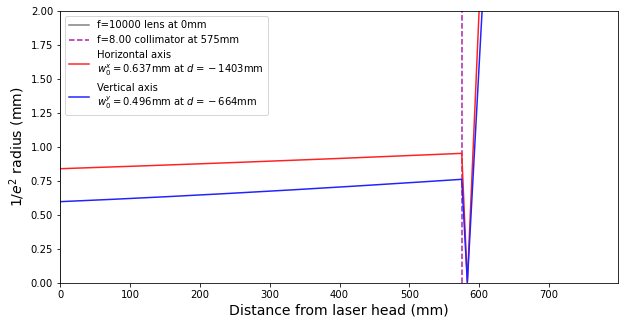

In [213]:
plt.figure(figsize=(10, 5))
plt.xlabel(r"Distance from laser head (mm)", fontsize=14)
plt.ylabel(r'$1/e^2$ radius (mm)', fontsize = 14)
plt.axvline(x=L1, color='gray', linestyle='-', label="f={:.00f} lens at {:.00f}mm".format(f1,L1))
plt.axvline(x=L2, color='#aa22aa', linestyle='--', label="f={:.02f} collimator at {:.00f}mm".format(f2,L2))
plt.plot(I,wfunc_x,linestyle="-", color="#ff2222",label="Horizontal axis"+"\n"+r"$w_0^x={:.03f}$mm at $d={:.00f}$mm".format(w0in_x,spot_x))
plt.plot(I,wfunc_y,linestyle="-", color="#2222ff",label="Vertical axis"+"\n"+r"$w_0^y={:.03f}$mm at $d={:.00f}$mm".format(w0in_y,spot_y))

plt.xlim(0,np.max(I))
plt.ylim(0,2.0)
plt.legend()

In [214]:
I_magnified = np.linspace(x02+spot_y-zR02*1.5,x02+spot_y+zR02*1.5)
x_magnified = (I_magnified-(x02+spot_y))*1e3

wfunc_x=np.array(list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_x,spot_x,zR0_x,q1_x), I_magnified)))
wfunc_y=np.array(list(map(lambda n:beamradius(n,L1,f1,L2,f2,w0in_y,spot_y,zR0_y,q1_y), I_magnified)))

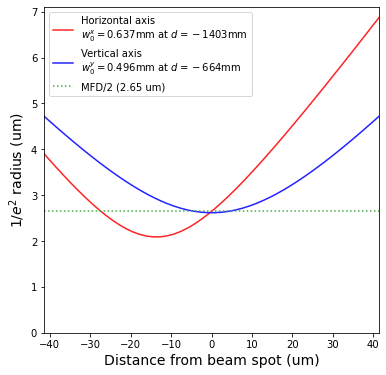

In [215]:
plt.figure(figsize=(6, 6))
plt.xlabel(r"Distance from beam spot (um)", fontsize=14)
plt.ylabel(r'$1/e^2$ radius (um)', fontsize = 14)
plt.plot(x_magnified,wfunc_x*1e3,linestyle="-", color="#ff2222",label="Horizontal axis"+"\n"+r"$w_0^x={:.03f}$mm at $d={:.00f}$mm".format(w0in_x,spot_x))
plt.plot(x_magnified,wfunc_y*1e3,linestyle="-", color="#2222ff",label="Vertical axis"+"\n"+r"$w_0^y={:.03f}$mm at $d={:.00f}$mm".format(w0in_y,spot_y))
plt.axhline(y=5.3/2, color='#44aa44', linestyle=':',label="MFD/2 (%.02f um)"%(5.3/2))

plt.xlim(np.min(x_magnified),np.max(x_magnified))
plt.ylim(0,)
plt.legend()